In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.utils import to_categorical

In [2]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[2]


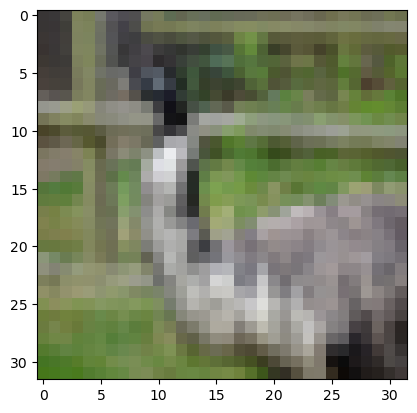

In [7]:
i = 5603
plt.imshow(X_train[i])
print(y_train[i])

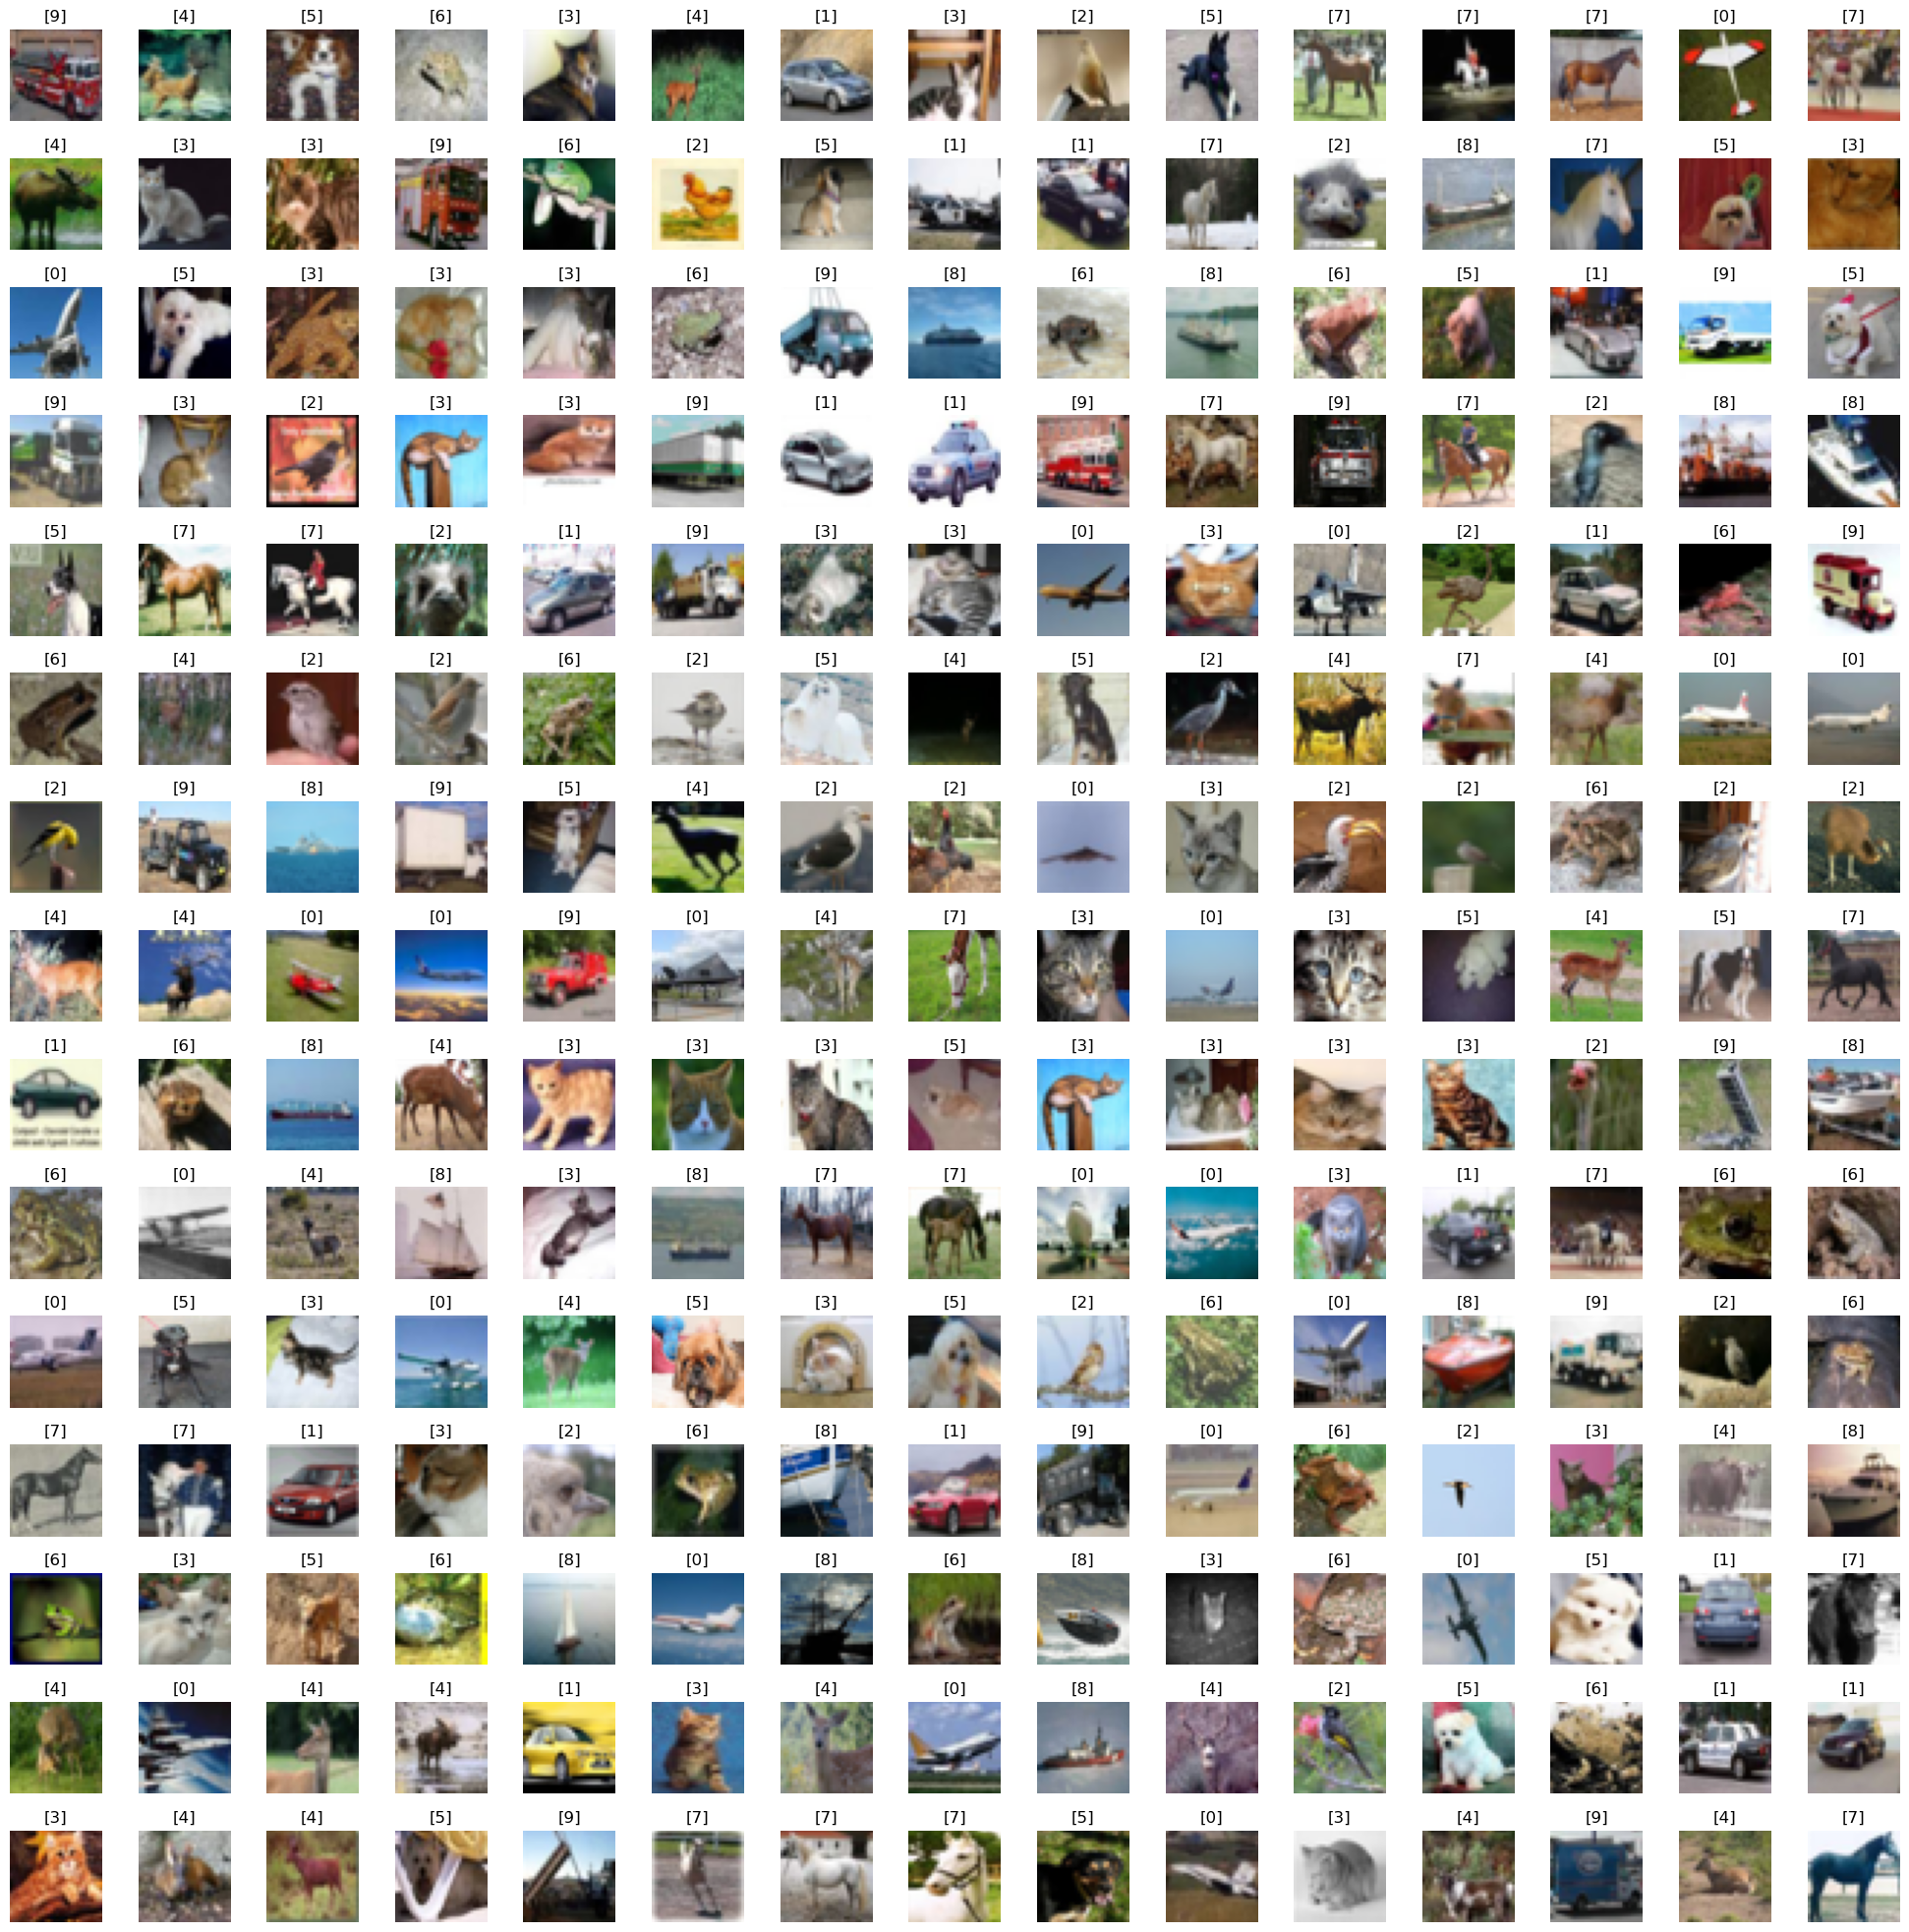

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [9]:
n_training

50000

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [14]:
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [24]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 50, shuffle = True)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.7396 - loss: 0.7802
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7400 - loss: 0.7959
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7461 - loss: 0.7802
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7516 - loss: 0.7709
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.7592 - loss: 0.7453
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.7601 - loss: 0.7443
Epoch 13/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.7636 - loss: 0.7442
Epoch 14/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.7718 - loss: 0.7200
Epoch 15/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.7722 - loss: 0.7135
Epoch 16/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7748 - loss: 0.7123
Epoch 17/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7817 - loss: 0

In [25]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7783 - loss: 0.7677
Test Accuracy: 0.7781000137329102


In [26]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [27]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [28]:
y_test = y_test.argmax(1)

In [29]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

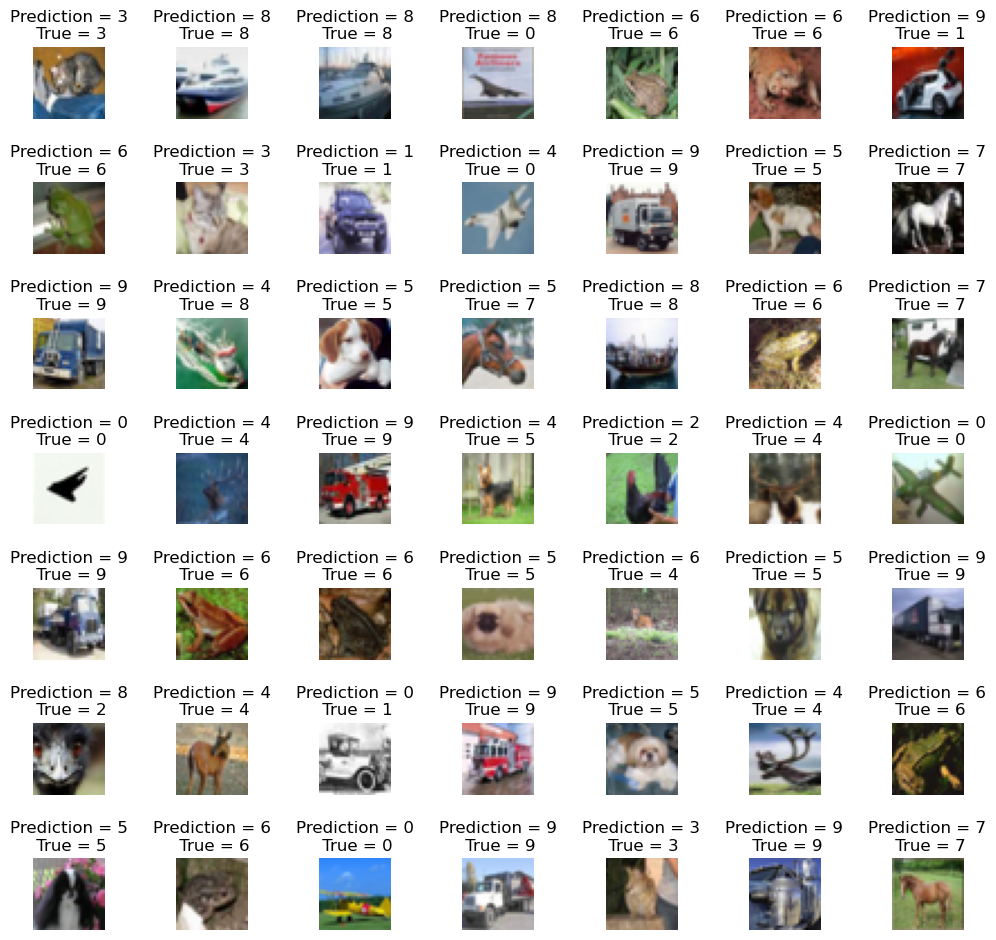

In [30]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

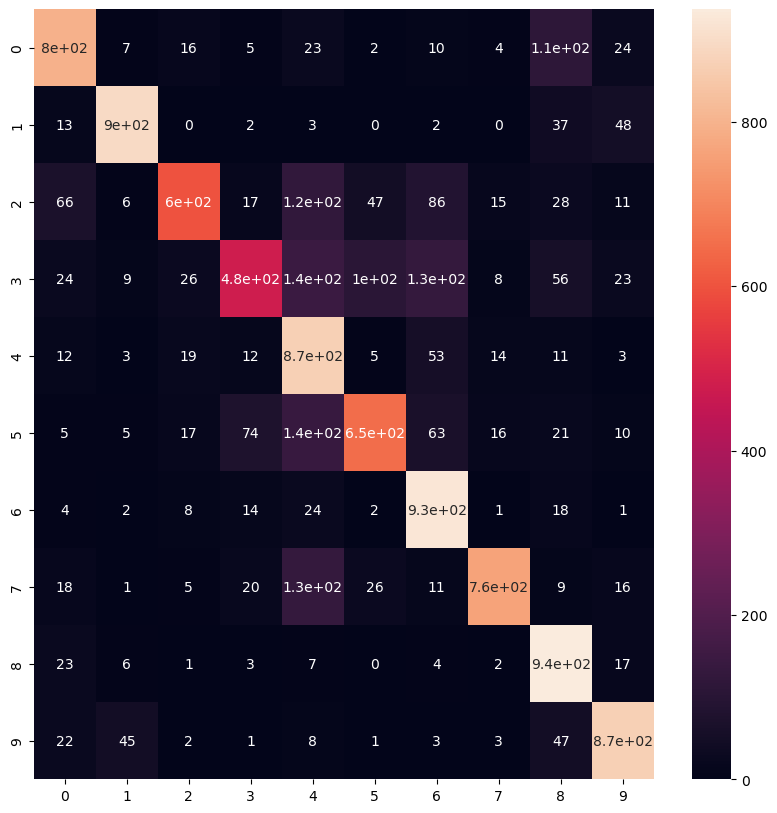

In [31]:
cm = confusion_matrix(y_test, predicted_classes)
cm

plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)